# Inverted Pendulum Task Description
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.


Remember that you are required to write a short report and presentation summarizing the findings from the lab sessions.

Content:
- *Objective:* What was the purpose of this lab exercise?
- *Procedure:* Describe how your group approached the tuning process.
- *Results:* Present the simulation results before and after tuning.
- *Analysis:* Discuss the effects of the PID gains on system performance.
- *Conclusion:* What did you learn about PID control systems?

In [1]:
import IPython
from IPython.display import Image
Image(url='https://www.gymlibrary.dev/_images/cart_pole.gif')

# Setting up the environment
This section introduces the inverted pendulum task and displays a visualization of the environment.

In [2]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
from pathlib import Path

class InvertedPendulum:
    def __init__(self, dt=0.02):
        # System constants
        self.gravity = 9.8        # Acceleration due to gravity (m/s^2)
        self.mass_cart = 1.0      # Mass of the cart (kg)
        self.mass_pole = 0.1      # Mass of the pole (kg)
        self.length = 0.5         # Length of the pole (m)
        self.dt = dt              # Time step (s)

        self.cart_friction = 0.1  # Cart friction coefficient (N per m/s)
        self.pole_damping = 0.02  # Pole damping coefficient (N*m per rad/s)

        # State variables: [cart position, cart velocity, pole angle, pole angular velocity]
        self.state = np.zeros(4)

        self.save_dir = 'temp/'
        Path(self.save_dir).mkdir(parents=True, exist_ok=True)

    def reset(self):
        """Resets the system state to a small random initial condition."""
        self.state = np.random.uniform(low=-0.05, high=0.05, size=(4,))
        return self.state

    def step(self, force):
        """
        Takes an action (force) and updates the system state.
        Args:
            force (float): Force applied to the cart (N)
        Returns:
            np.array: Updated state [cart position, cart velocity, pole angle, pole angular velocity]
        """
        def dynamics(state, force):
            x, x_dot, theta, theta_dot = state

            # Constants for easier calculations
            total_mass = self.mass_cart + self.mass_pole
            pole_mass_length = self.mass_pole * self.length
            cos_theta = np.cos(theta)
            sin_theta = np.sin(theta)

            # Apply simple linear friction and damping
            force_eff = force - self.cart_friction * x_dot

            # Equations of motion
            temp = (force_eff + pole_mass_length * theta_dot**2 * sin_theta) / total_mass
            theta_acc = (self.gravity * sin_theta - cos_theta * temp - (self.pole_damping * theta_dot) / (self.mass_pole * self.length)) / (
                self.length * (4.0 / 3.0 - self.mass_pole * cos_theta**2 / total_mass)
            )
            x_acc = temp - pole_mass_length * theta_acc * cos_theta / total_mass

            return np.array([x_dot, x_acc, theta_dot, theta_acc])

        # Integrate using RK4 for better stability
        state = self.state
        k1 = dynamics(state, force)
        k2 = dynamics(state + 0.5 * self.dt * k1, force)
        k3 = dynamics(state + 0.5 * self.dt * k2, force)
        k4 = dynamics(state + self.dt * k3, force)
        state = state + (self.dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

        self.state = state
        return self.state

    def render(self, file_idx=0, title="Inverted Pendulum"):
        """
        Plots the cart and pole position with a specified title for Colab.

        Args:
            title (str): Title to display on the plot.
        """
        x, _, theta, _ = self.state

        # Cart dimensions
        cart_width = 0.3
        cart_height = 0.2

        # Pole position
        pole_x = x + self.length * np.sin(theta)
        pole_y = self.length * np.cos(theta)

        # Clear previous output
        clear_output(wait=True)

        # Create a new figure
        plt.figure(figsize=(8, 4))
        plt.xlim(-2, 2)
        plt.ylim(-1, 1)
        plt.grid()

        # Draw the cart
        cart_rect = Rectangle((x - cart_width / 2, -cart_height / 2), cart_width, cart_height, color="blue")
        plt.gca().add_patch(cart_rect)

        # Draw the pole
        plt.plot([x, pole_x], [0, pole_y], color="red", linewidth=2)

        # Draw the pivot point
        plt.plot(x, 0, 'ko', markersize=5)

        # Set the title
        plt.title(title)

        # # Save figure
        # plt.savefig(self.save_dir + str(file_idx) + '.png')

        # Display the updated plot
        plt.show()

Running simulation (with display)

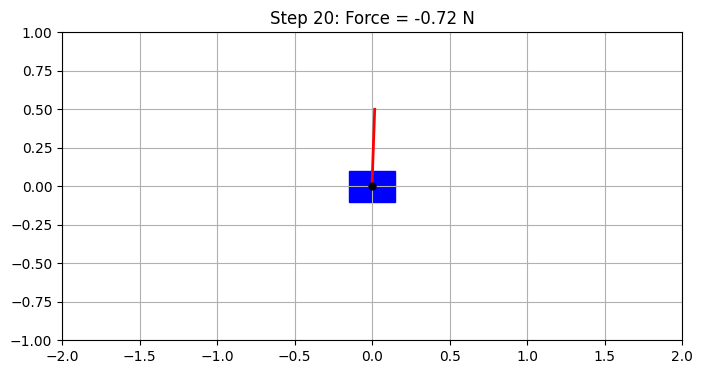

Step: 19 , States: [-0.00083531 -0.08486271  0.03518217  0.30265364]


In [8]:
# Create an instance of the inverted pendulum system
pendulum = InvertedPendulum()

# Reset the system to a random initial state
states = pendulum.reset()

states_list = [] # List to save states for plot later
action_list = [] # List to save actions for plot later

SIMULATION_STEPS = 20 # number of time steps to take in simulation

# Simulate the system with random forces and render the results
for step in range(SIMULATION_STEPS):
    action = np.random.uniform(-1, 1)  # Random action in the range [-10, 10] N
    states = pendulum.step(action) # Apply action on cart

    # Saving for plots later
    states_list.append(states)
    action_list.append(action)

    pendulum.render(file_idx=step, title=f"Step {step + 1}: Force = {action:.2f} N") # Display function
    print('Step:', step, ', States:', states)

Plotting the states of the system.

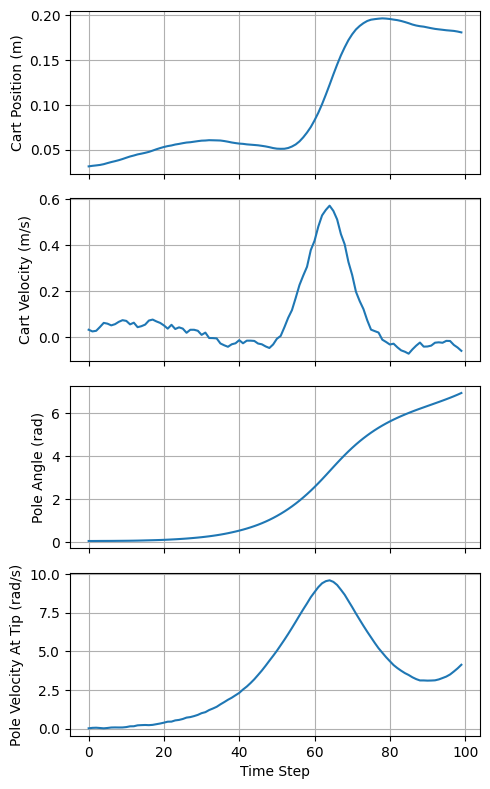

In [5]:
import matplotlib.pyplot as plt

num_states = len(states_list[0])  # Number of observatioSns per step
fig, axes = plt.subplots(num_states, 1, sharex=True, figsize=(5, 2 * num_states))

# Y-axis labels
y_labels = ["Cart Position (m)", "Cart Velocity (m/s)", "Pole Angle (rad)", "Pole Velocity At Tip (rad/s)"]

for i in range(num_states):
    states_values = [s[i] for s in states_list]
    axes[i].plot(states_values)
    axes[i].set_ylabel(y_labels[i])
    axes[i].grid(True)

axes[-1].set_xlabel("Time Step")
plt.tight_layout()
plt.show()

## **Task:** Understand the System Dynamics (15 mins)

To get a deeper understanding of how the inverted pendulum works and how the system state evolves.

- Run the simulation with zero force input and observe the behavior of the pendulum.

  -  What happens to the cart and pole when no external force is applied?
  - How does the pole behave over time?

- Change initial conditions:

  - Modify the initial position of the cart and the angle of the pole. Run the simulation and observe the difference in behavior.
  - How does the system behave when the pole starts at a larger angle (e.g., 0.5 radians)?

In [12]:
np.random.uniform(-0.05, 0.05)

0.04518874853776288

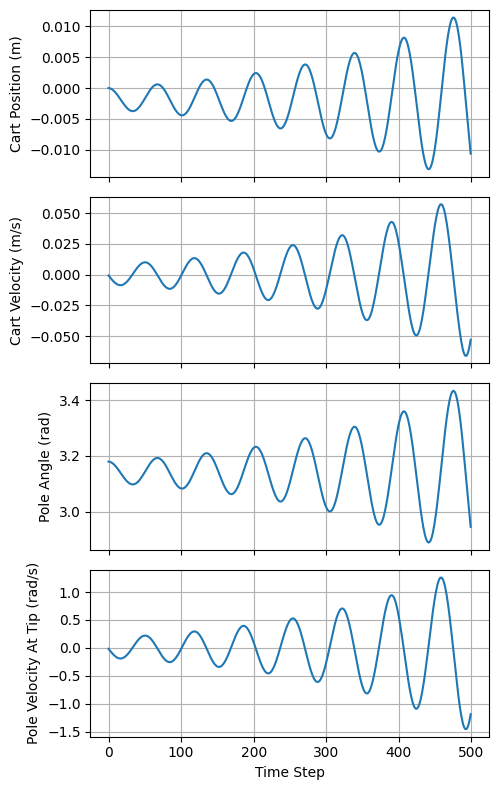

In [6]:
# Create an instance of the inverted pendulum system
pendulum = InvertedPendulum()

# Reset the system to a random initial state
states = pendulum.reset()

### TODO: Vary initial pole position (state[2]) & velocity (state[3]) here.
pendulum.state[0] = 0.0
pendulum.state[1] = 0.0
pendulum.state[2] = math.pi + np.random.uniform(-0.05, 0.05)
pendulum.state[3] = 0.0 # + np.random.uniform(-0.05, 0.05)

states_list = [] # List to save states for plot later
action_list = [] # List to save actions for plot later

SIMULATION_STEPS = 500 # number of time steps to take in simulation


# Simulate the system with random forces and render the results
for step in range(SIMULATION_STEPS):

    # TODO: Vary fource applied on cart
    action = 0.0 # np.random.uniform(-1, 1)  # Random action in the range [-10, 10] N

    states = pendulum.step(action) # Apply action on cart

    # Saving for plots later
    states_list.append(states)
    action_list.append(action)

    ## Switching off display
    # pendulum.render(title=f"Step {step + 1}: Force = {action:.2f} N") # Display function
    # print(states)


num_states = len(states_list[0])  # Number of observatioSns per step
fig, axes = plt.subplots(num_states, 1, sharex=True, figsize=(5, 2 * num_states))

# Y-axis labels
y_labels = ["Cart Position (m)", "Cart Velocity (m/s)", "Pole Angle (rad)", "Pole Velocity At Tip (rad/s)"]

for i in range(num_states):
    states_values = [s[i] for s in states_list]
    axes[i].plot(states_values)
    axes[i].set_ylabel(y_labels[i])
    axes[i].grid(True)

axes[-1].set_xlabel("Time Step")
plt.tight_layout()
plt.show()

## Stress tests (RK4 + damping + PID with cart position)
This section adds a PID controller that includes cart position feedback and runs stress tests
with longer horizons, larger forces, varied `dt`, disturbances, and measurement noise.


In [ ]:
import numpy as np

def wrap_angle(a):
    return (a + np.pi) % (2 * np.pi) - np.pi

def simulate(pend, steps, controller, noise_std=0.0, force_disturbance=None, force_limit=None, seed=0):
    rng = np.random.default_rng(seed)
    state_hist = []
    for t in range(steps):
        state = pend.state.copy()
        noisy_state = state.copy()
        if noise_std > 0:
            noisy_state += rng.normal(0, noise_std, size=4)
        force = controller(noisy_state, t)
        if force_disturbance is not None:
            force += force_disturbance(t)
        if force_limit is not None:
            force = float(np.clip(force, -force_limit, force_limit))
        state = pend.step(force)
        if not np.all(np.isfinite(state)):
            return {"ok": False, "reason": "non-finite"}
        if np.any(np.abs(state) > 1e6):
            return {"ok": False, "reason": "blowup"}
        state_hist.append(state.copy())
    return {"ok": True, "states": np.array(state_hist)}

def random_force_controller(scale, seed=0):
    rng = np.random.default_rng(seed)
    def c(_state, _t):
        return float(rng.uniform(-scale, scale))
    return c

def zero_controller(_state, _t):
    return 0.0

def make_pid_with_position(theta_ref, kp, kd, ki, kx, kx_dot, dt):
    integ = 0.0
    def controller(state, _t):
        nonlocal integ
        x, x_dot, theta, theta_dot = state
        err = wrap_angle(theta - theta_ref)
        integ += err * dt
        return -kp * err - kd * theta_dot - ki * integ - kx * x - kx_dot * x_dot
    return controller

def tune_pid_with_position(dt=0.02, seed=0):
    rng = np.random.default_rng(seed)
    theta_ref = np.pi
    best = None
    for kp in [20, 40, 60, 80]:
        for kd in [2, 4, 6, 8]:
            for ki in [0.0, 0.5, 1.0]:
                for kx in [0.1, 0.5, 1.0, 2.0]:
                    for kx_dot in [0.1, 0.5, 1.0, 2.0]:
                        pend = InvertedPendulum(dt=dt)
                        pend.reset()
                        pend.state[0] = 0.0
                        pend.state[1] = 0.0
                        pend.state[2] = theta_ref + 0.1
                        pend.state[3] = 0.0
                        controller = make_pid_with_position(theta_ref, kp, kd, ki, kx, kx_dot, dt)
                        sim = simulate(pend, 3000, controller, noise_std=0.0, force_limit=25, seed=seed)
                        if not sim["ok"]:
                            continue
                        states = sim["states"]
                        err = wrap_angle(states[:, 2] - theta_ref)
                        score = float(np.sqrt(np.mean(err**2)) + 0.05 * np.sqrt(np.mean(states[:, 0] ** 2)))
                        if best is None or score < best["score"]:
                            best = {"kp": kp, "kd": kd, "ki": ki, "kx": kx, "kx_dot": kx_dot, "score": score}
    return best

best = tune_pid_with_position(dt=0.02, seed=1)
print("Best PID+pos gains:", best)

def pid_controller_factory(dt):
    return make_pid_with_position(np.pi, best["kp"], best["kd"], best["ki"], best["kx"], best["kx_dot"], dt)

def impulse_disturbance(t):
    return 30.0 if 300 <= t < 360 else 0.0

def bias_disturbance(_t):
    return 2.0

def sinusoid_disturbance(t):
    return 5.0 * np.sin(0.02 * t)

conditions = [
    {"name": "open_loop_long_horizon", "steps": 50000, "controller": zero_controller, "dt": 0.02},
    {"name": "open_loop_large_forces", "steps": 10000, "controller": random_force_controller(100, seed=0), "dt": 0.02},
    {"name": "open_loop_varied_dt_small", "steps": 15000, "controller": random_force_controller(20, seed=1), "dt": 0.005},
    {"name": "open_loop_varied_dt_large", "steps": 5000, "controller": random_force_controller(20, seed=2), "dt": 0.05},
    {"name": "pidpos_nominal", "steps": 8000, "controller_factory": pid_controller_factory, "dt": 0.02, "force_limit": 25},
    {"name": "pidpos_impulse_disturbance", "steps": 8000, "controller_factory": pid_controller_factory, "dt": 0.02, "force_limit": 25, "force_disturbance": impulse_disturbance},
    {"name": "pidpos_bias_disturbance", "steps": 8000, "controller_factory": pid_controller_factory, "dt": 0.02, "force_limit": 25, "force_disturbance": bias_disturbance},
    {"name": "pidpos_sinusoid_disturbance", "steps": 8000, "controller_factory": pid_controller_factory, "dt": 0.02, "force_limit": 25, "force_disturbance": sinusoid_disturbance},
    {"name": "pidpos_noise_on_state", "steps": 8000, "controller_factory": pid_controller_factory, "dt": 0.02, "force_limit": 25, "noise_std": 0.02},
]

seeds = [0, 1, 2]
summary = []
for cond in conditions:
    for seed in seeds:
        pend = InvertedPendulum(dt=cond["dt"])
        pend.reset()
        pend.state[0] = 0.0
        pend.state[1] = 0.0
        pend.state[2] = np.pi + 0.1
        pend.state[3] = 0.0
        if "controller" in cond:
            controller = cond["controller"]
        else:
            controller = cond["controller_factory"](cond["dt"])
        sim = simulate(
            pend,
            cond["steps"],
            controller,
            noise_std=cond.get("noise_std", 0.0),
            force_disturbance=cond.get("force_disturbance"),
            force_limit=cond.get("force_limit"),
            seed=seed,
        )
        label = f"{cond['name']}|seed={seed}"
        if not sim["ok"]:
            summary.append((label, "FAIL", sim["reason"]))
            continue
        states = sim["states"]
        max_abs = np.max(np.abs(states), axis=0)
        err = wrap_angle(states[:, 2] - np.pi)
        err_rms = float(np.sqrt(np.mean(err**2)))
        x_rms = float(np.sqrt(np.mean(states[:, 0] ** 2)))
        summary.append((label, "OK", {"max_abs": max_abs, "theta_rms": err_rms, "x_rms": x_rms}))

print("Summary")
for name, status, info in summary:
    print(name, status, info)
